<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/8_2_%EB%B2%A0%EB%A5%B4%EB%88%84%EC%9D%B4%EB%B6%84%ED%8F%AC%EC%99%80_%EC%9D%B4%ED%95%AD%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 그래프 setting
%matplotlib inline
import numpy as np
import scipy as sp # 치해석기능을 제공하는 파이썬 패키지
import scipy.stats # 확률분포 분석을 위한 다양한 기능
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

# warnings.filterwarnings(action='ignore') 

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=11)
plt.rcParams["figure.figsize"] = (12,7)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


- 베르누이분포와 이항분포는 확률분포 중 가장 단순한 분포로 분류문제에서 널리 사용됨
- 개념을 알아보고 이 분포들이 스팸메일 필터링에 어떻게 쓰이는지 살펴보자

### 1) 베르누이 시행
- 베르누이 시행(Bernoulli trial) : 결과가 두 가지 중 하나로만 나오는 실험이나 시행
> ex) 동전을 한 번 던져 앞면(H:Head)이 나오거나 뒷면(T:Tail)이 나오게 하는 것

### 2) 베르누이 확률변수
- 베르누이 확률변수(Bernoulli random variable) : 베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것 (때로는 1과 -1로도 표현)
- 베르누이 확률변수는 두 값 중 하나만 가짐 :  이산확률변수(discrete random variable)


### 3) 베르누이 확률분포
- 베르누이 확률변수의 분포 = 베르누이 확률분포 or 베르누이분포

- If 어떤 확률변수 $X$가 베르누이분포에 의해 발생된다면 → 확률변수 $X$가 베르누이분포를 따른다.
> $$
\begin{align}
X \sim \text{Bern}(x;\mu)
\end{align}
$$

- 베르누이분포의 확률질량함수 
> $$
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
$$
> - $\mu$ : 1이 나올 확률, $1 - \mu$ : 0이 나올 확률 
> - 변수와 모수는 세미콜론(;, semicolon)기호로 분리함.

- 최종 수식 정리
> $$
\begin{align}
\text{Bern}(x;\mu) = \mu^x(1-\mu)^{(1-x)}
\end{align}
$$

#### 연습 문제 8.2.1

위 식에서 $x=1$과 $x=0$을 각각 대입하여 원래의 확률질량함수 수식이 나오는 것을 확인한다.

> 답 :
1. $x=1$
> \begin{align}
\text{Bern}(x=1;\mu) = \mu^1(1-\mu)^{(1-1)} = \mu
\end{align}
2. $x=0$
> \begin{align}
\text{Bern}(x=0;\mu) = \mu^0(1-\mu)^{(1-0)} = 1(1-\mu)^1 = 1- \mu
\end{align}

### 4) 사이파이를 사용한 베르누이 확률변수의 시뮬레이션

In [ ]:
mu = 0.6                    # 모수 p=0.6
rv = sp.stats.bernoulli(mu) # 베르누이 확률변수
type(rv)                    # 앞면이 나올 확률이 0.6인 동전

scipy.stats._distn_infrastructure.rv_frozen

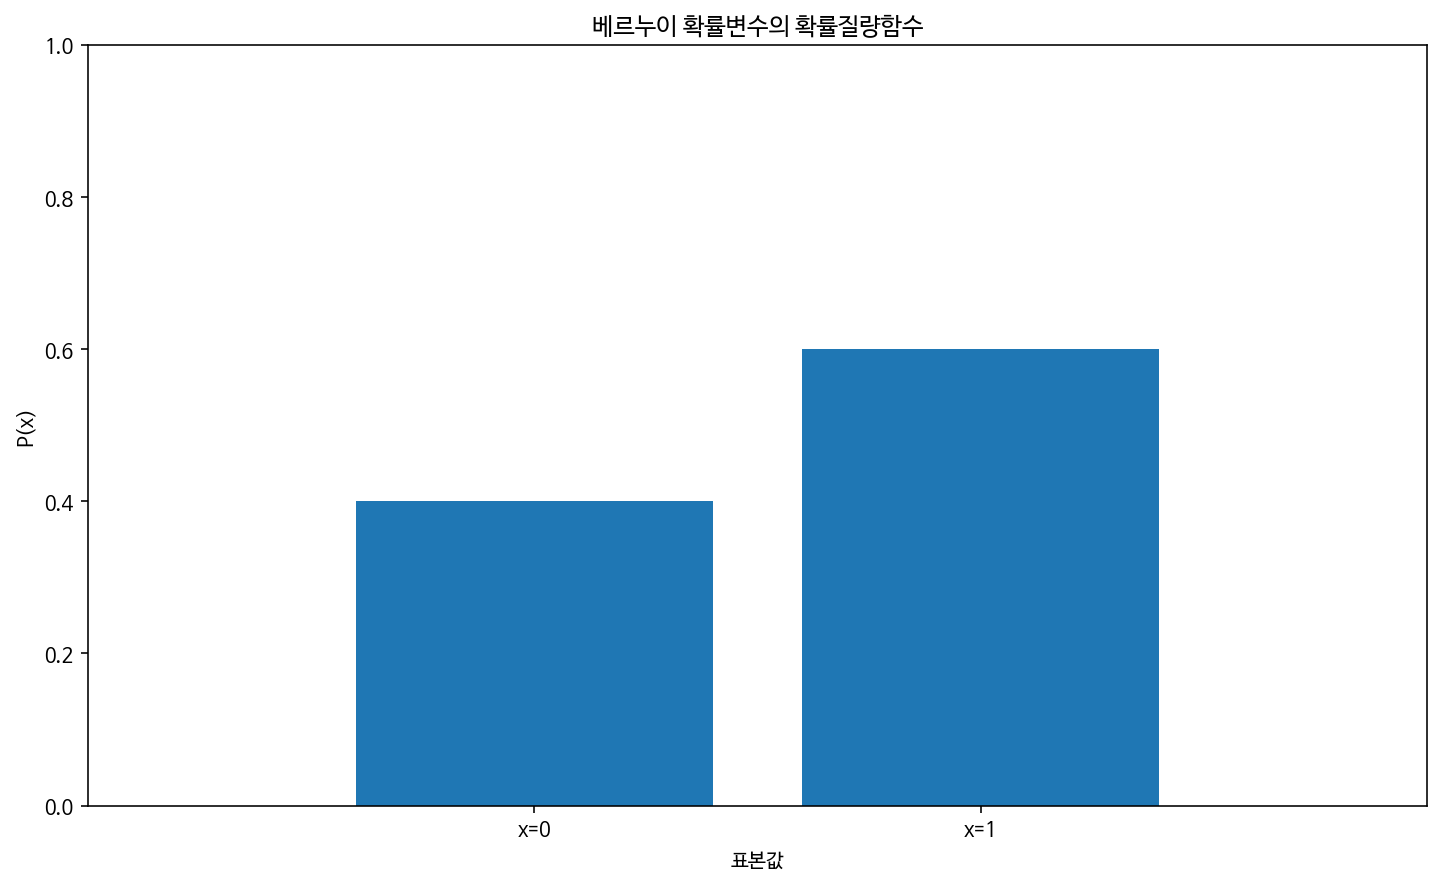

In [ ]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))  # pmf() : 확률질량함수 계산
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [ ]:
x = rv.rvs(100, random_state=0) # 시뮬레이션(simulation) : 표본값을 무작위로 생성
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


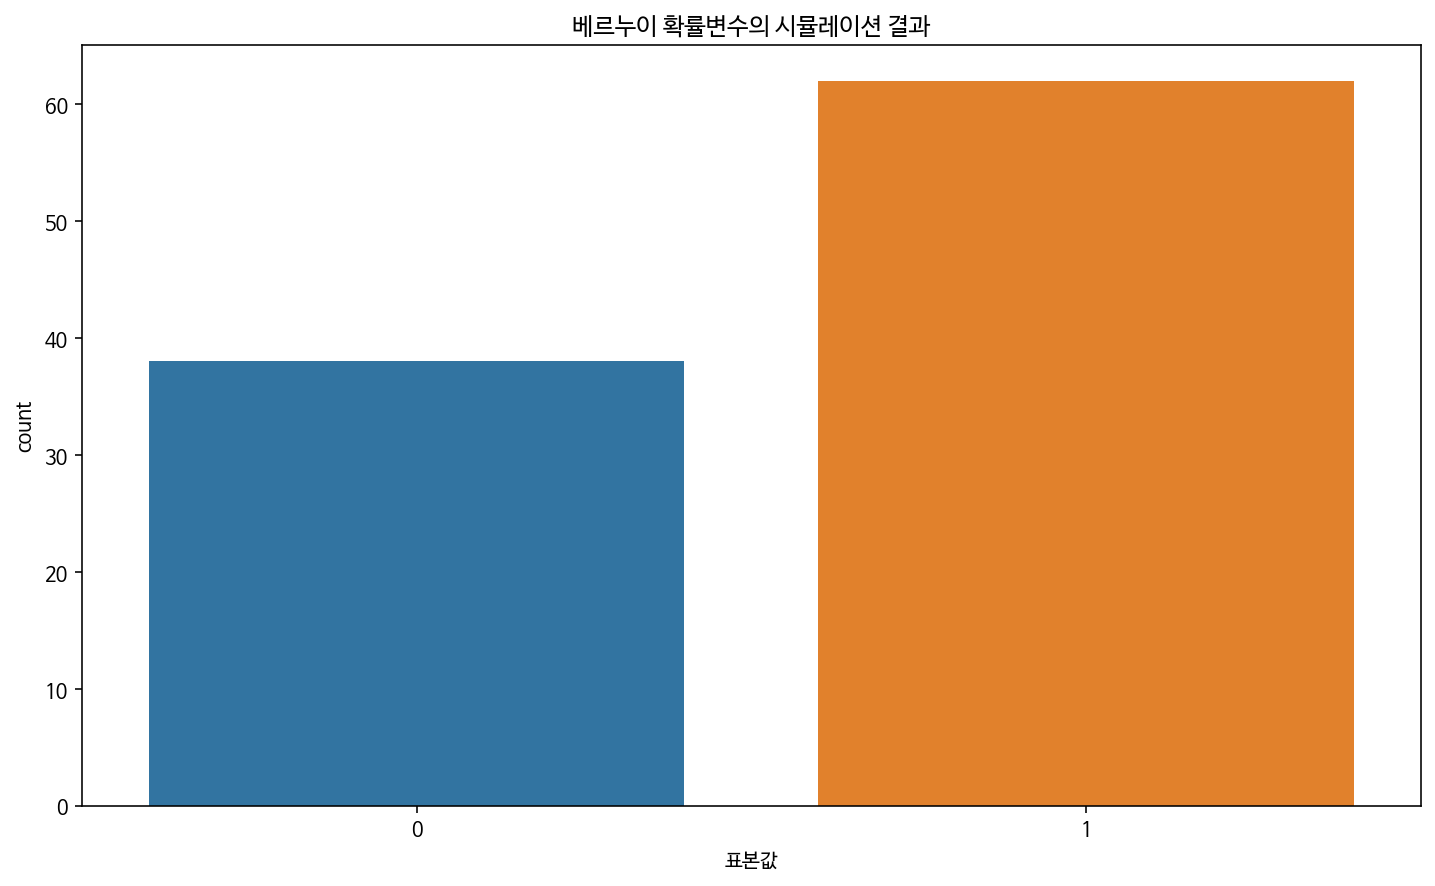

In [ ]:
# 표본 생성 결과 시각화
sns.countplot(x)
plt.title("베르누이 확률변수의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

In [ ]:
# 이론 확률분포 vs 표본의 확률분포

y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [ ]:
df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


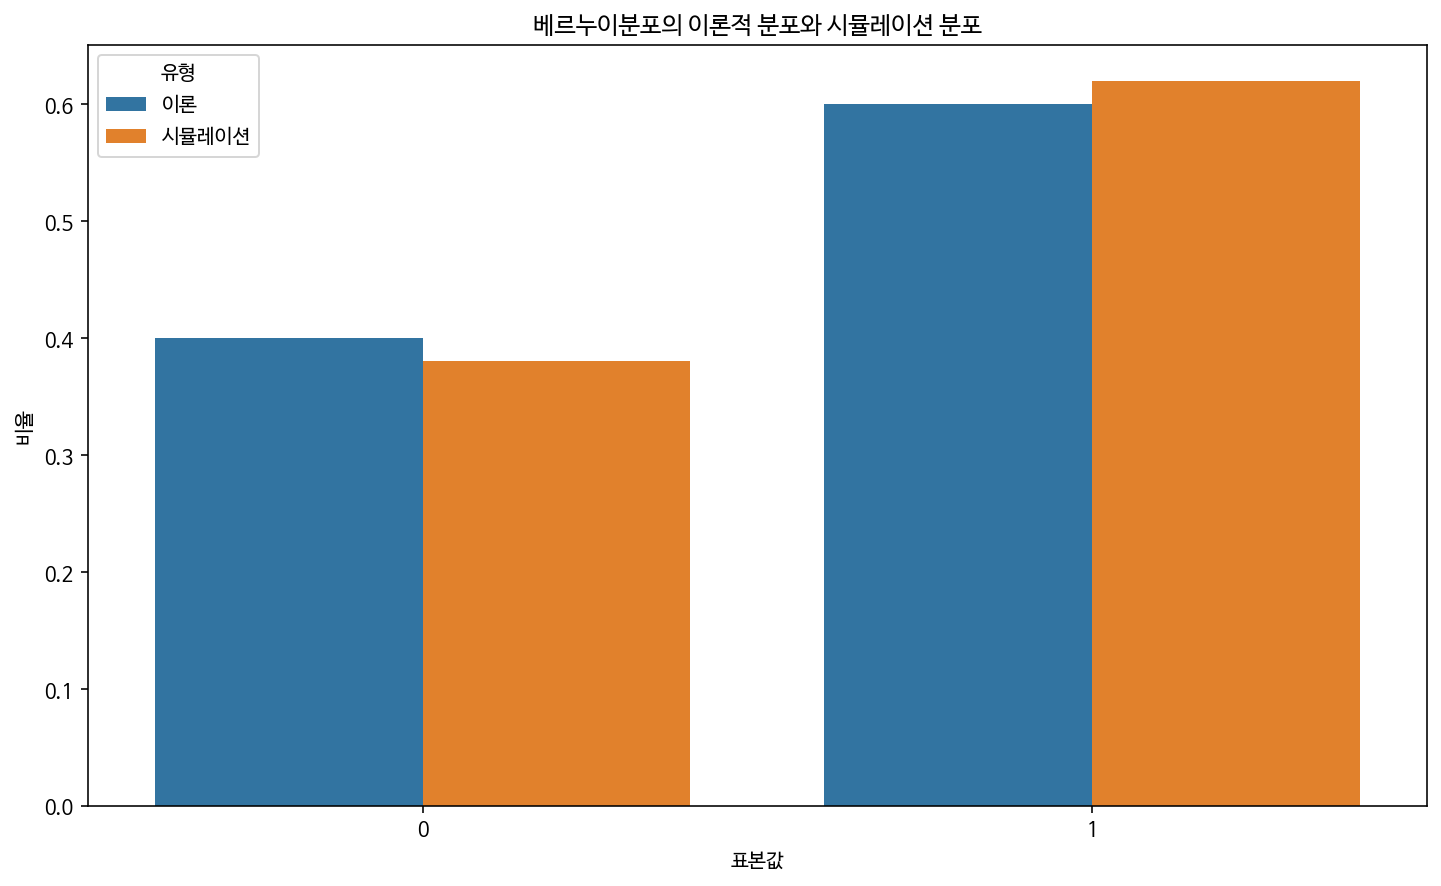

In [ ]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

#### 연습 문제 8.2.2

베르누이 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 바 플롯을 그린다.
표본 개수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

(1) $\mu = 0.5$

(2) $\mu = 0.9$


In [ ]:
mu_1 = 0.5                   
rv_1 = sp.stats.bernoulli(mu_1) 

x_10 = rv_1.rvs(10, random_state=0)
x_1000 = rv_1.rvs(1000, random_state=0)

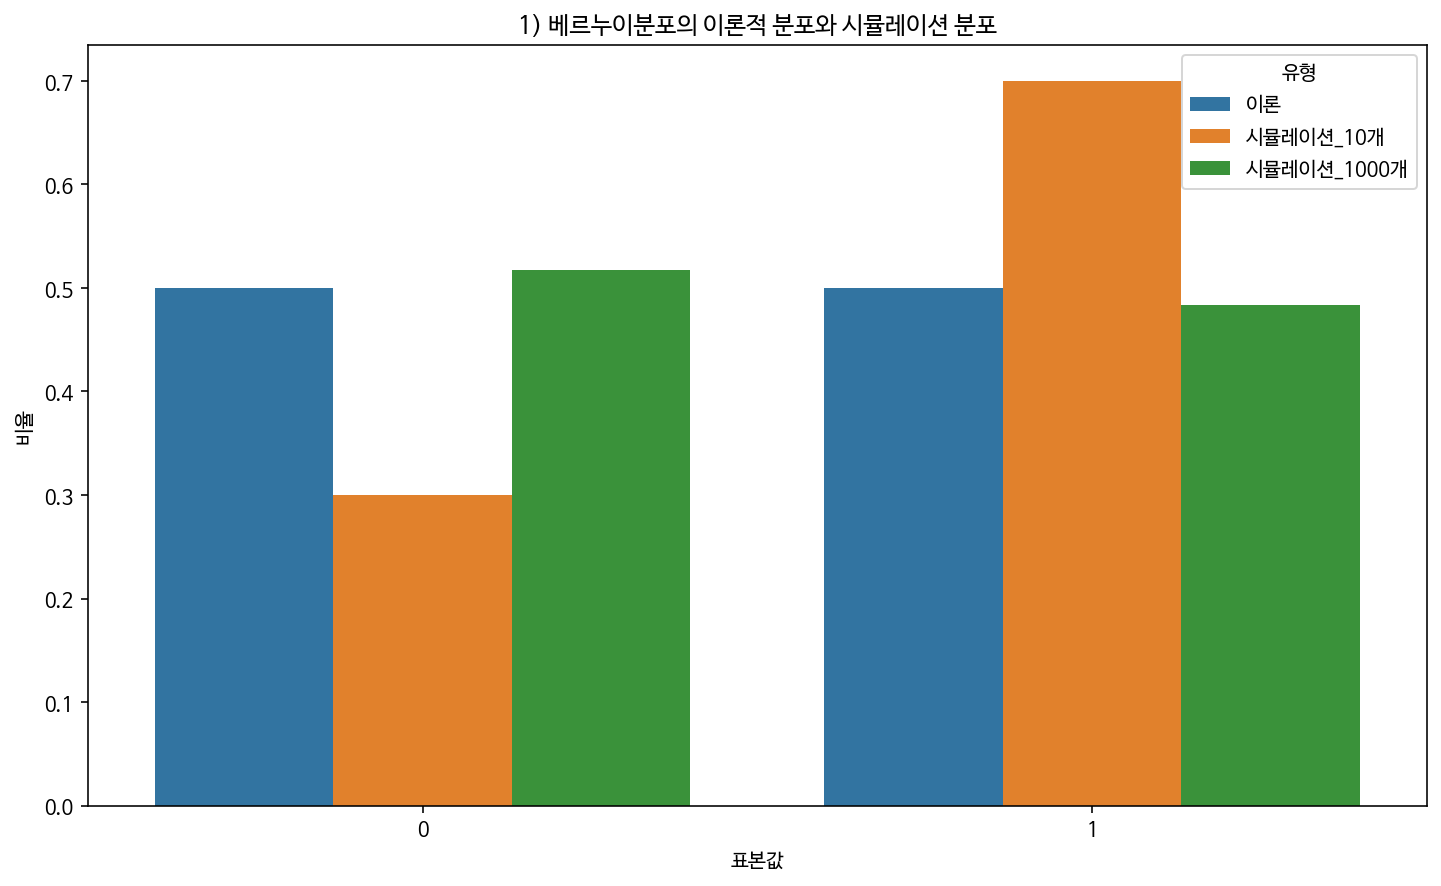

In [ ]:
y_10 = np.bincount(x_10, minlength=2) / float(len(x_10))
y_1000 = np.bincount(x_1000, minlength=2) / float(len(x_1000))

df = pd.DataFrame({"이론": rv_1.pmf(xx), "시뮬레이션_10개": y_10, "시뮬레이션_1000개": y_1000})
df.index = [0, 1]

df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]

sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("1) 베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

In [ ]:
mu_2 = 0.9                   
rv_2 = sp.stats.bernoulli(mu_2)

x_10 = rv_2.rvs(10, random_state=0)
x_1000 = rv_2.rvs(1000, random_state=0)

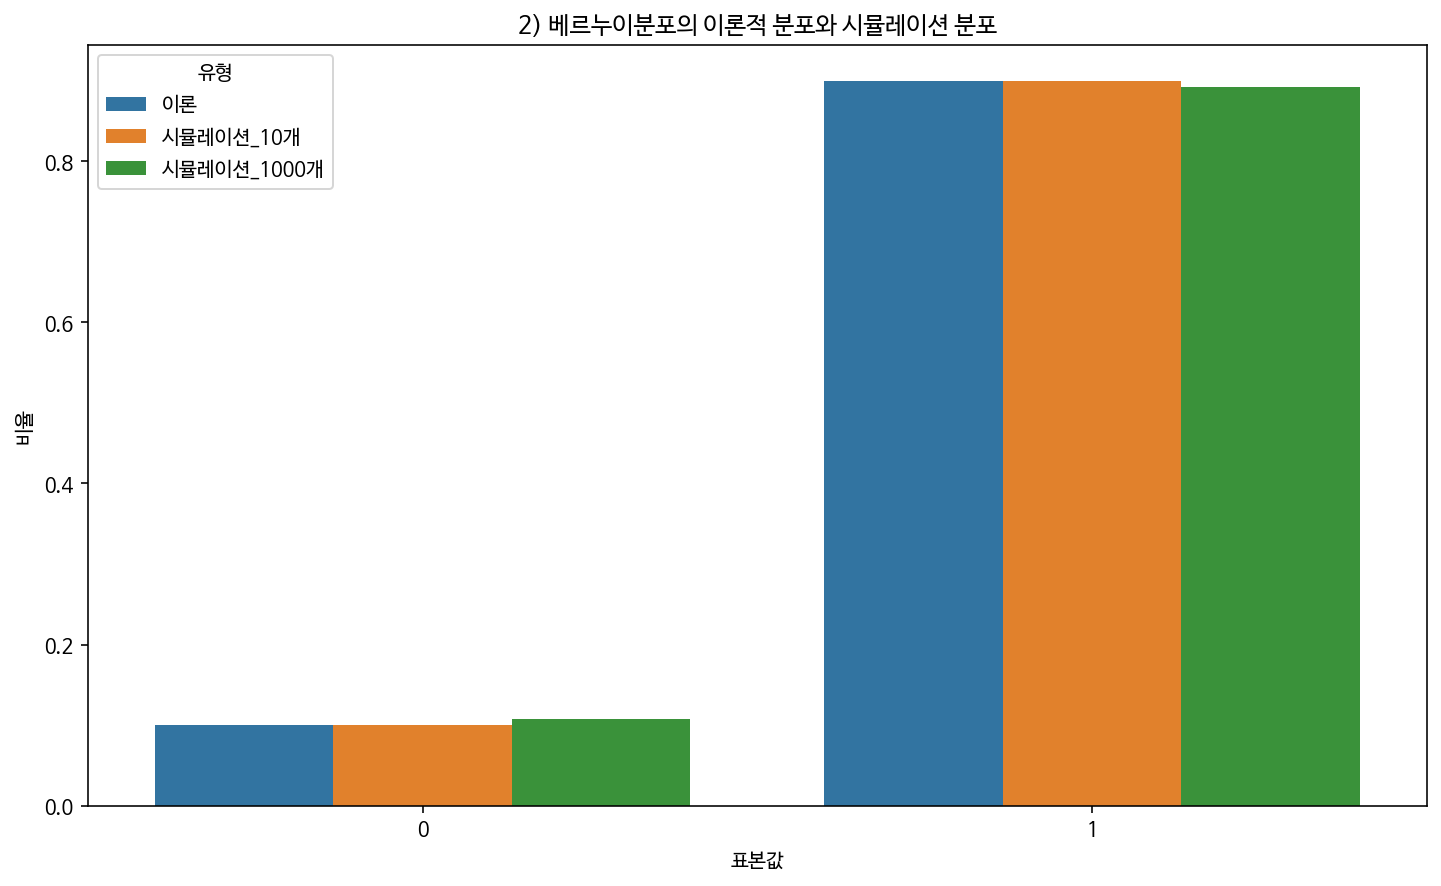

In [ ]:
y_10 = np.bincount(x_10, minlength=2) / float(len(x_10))
y_1000 = np.bincount(x_1000, minlength=2) / float(len(x_1000))

df = pd.DataFrame({"이론": rv_2.pmf(xx), "시뮬레이션_10개": y_10, "시뮬레이션_1000개": y_1000})
df.index = [0, 1]

df2 = df.stack().reset_index()
df2.columns = ["표본값", "유형", "비율"]

sns.barplot(x="표본값", y="비율", hue="유형", data=df2)
plt.title("2) 베르누이분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 5) 베르누이분포의 모멘트


* 기댓값
> $$
\begin{align}
\text{E}[X]  = \mu
\end{align}
$$
> (증명)
> $$
\begin{align}
\begin{aligned}
\text{E}[X] 
&= \sum_{x_i \in \Omega} x_i p(x_i) \\
&= 1 \cdot \mu + 0 \cdot (1 - \mu) \\
&= \mu
\end{aligned}
\end{align}
$$

* 분산
> $$
\begin{align}
\text{Var}[X] = \mu(1-\mu)
\end{align}
$$
> (증명)
> $$
\begin{align}
\begin{aligned}
\text{Var}[X] 
&= \sum_{x_i \in \Omega} (x_i - \mu)^2 p(x_i) \\
&= (1 - \mu)^2 \cdot \mu + (0 - \mu)^2 \cdot (1 - \mu) \\
&= \mu(1-\mu)
\end{aligned}
\end{align}
$$

- 앞의 예인 경우 $\mu = 0.6$, 이론적인 기댓값과 분산은 아래와 같음
> $$
\begin{align}
\text{E}[X] = 0.6
\end{align}
$$
<br>
> $$
\begin{align}
\text{Var}[X] = 0.6 \cdot (1 - 0.6) = 0.24
\end{align}
$$

데이터에서 계산한 표본평균 및 표본분산은 다음과 같이 계산한다.

In [ ]:
# 표본평균
np.mean()

0.62

In [ ]:
# 표본분산
np.var(x, ddof=1)

0.23797979797979804

In [ ]:
# 사이파이가 제공하는 describe 명령
s = sp.stats.describe(x)
s[2], s[3]

(0.62, 0.23797979797979804)

### 6) 이항분포

- if 성공확률이 $\mu$ 인 베르누이 시행을 $N$번 반복하는 경우
> - 가장 운이 좋을 경우 : $N$번 모두 성공
> - 가장 운이 나쁜 경우 : 한 번도 성공 X
> - 확률변수 $X$ : $N$번 중 성공한 횟수 = $X$의 값은 0 부터 $N$ 까지의 정수 중 하나

- 표본 데이터가 여럿 : 이항분포 
- 표본 데이터가 하나 : 베르누이분포

<br>

- 이항분포(binomial distribution)를 따르는 확률변수
> $$
\begin{align}
X \sim \text{Bin}(x;N,\mu)
\end{align}
$$

- 베르누이 확률 분포를 따르는 확률변수 $Y$를 가정
> $$
\begin{align}
Y \sim \text{Bern}(y;\mu)
\end{align}
$$

- 확률변수 $N$개의 표본을 $y_1, y_2, \cdots, y_N$라고 하자. 이 값은 모두 0(실패) 아니면 1(성공)이라는 값을 가지기 때문에 $N$번 중 성공한 횟수는 $N$개의 표본값의 합이다.
> $$
\begin{align}
x = \sum_{i=1}^N y_i
\end{align}
$$

- 베르누이분포를 따르는 확률변수 $Y$의 확률질량함수를 대입하여 정리하면, 이항분포 확률변수 $X$의 확률질량함수는 다음과 같아진다.
> $$
\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}
$$
> $\binom N x$ = 조합(combination) 기호로, $N$개 원소 중에 $x$개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다.
> $$
\begin{align}
\binom N x =\dfrac{N!}{x!(N-x)!}
\end{align}
$$

### 7) 사이파이를 사용한 이항분포의 시뮬레이션

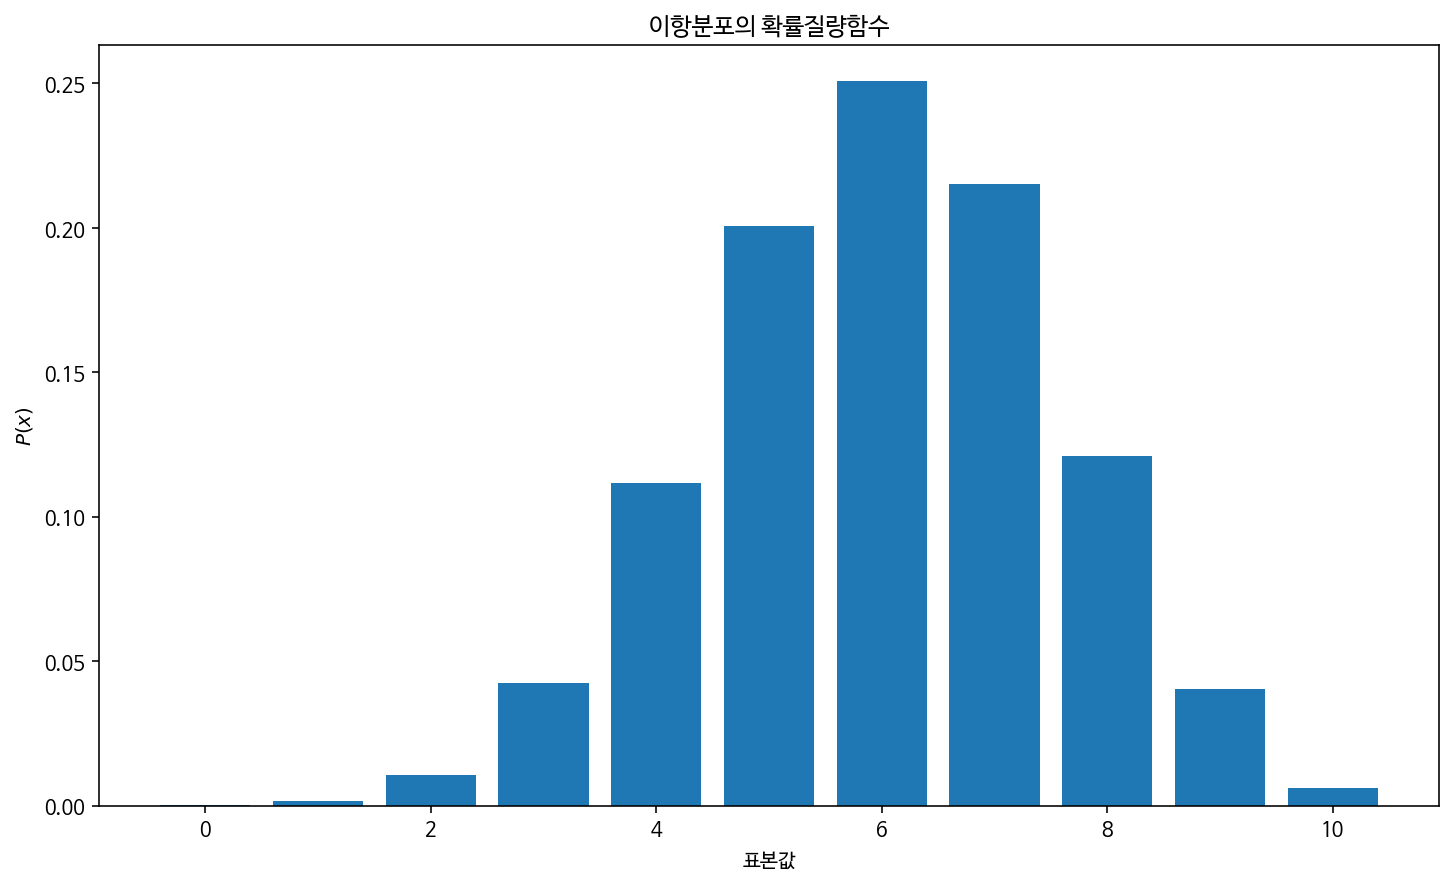

In [ ]:
N = 10                     # 전체 시행 횟수
mu = 0.6                   # 기댓값
rv = sp.stats.binom(N, mu) # binom : 이항분포 확률변수

xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align="center")
plt.xlabel("표본값")
plt.ylabel("$P(x)$")
plt.title("이항분포의 확률질량함수")
plt.show()
# 단봉분포지만, 0부터 N사이의 정수값만 가질 수 있고 모수(mu)의 값에 따라 봉우리의 위치가 달라진다.

In [ ]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


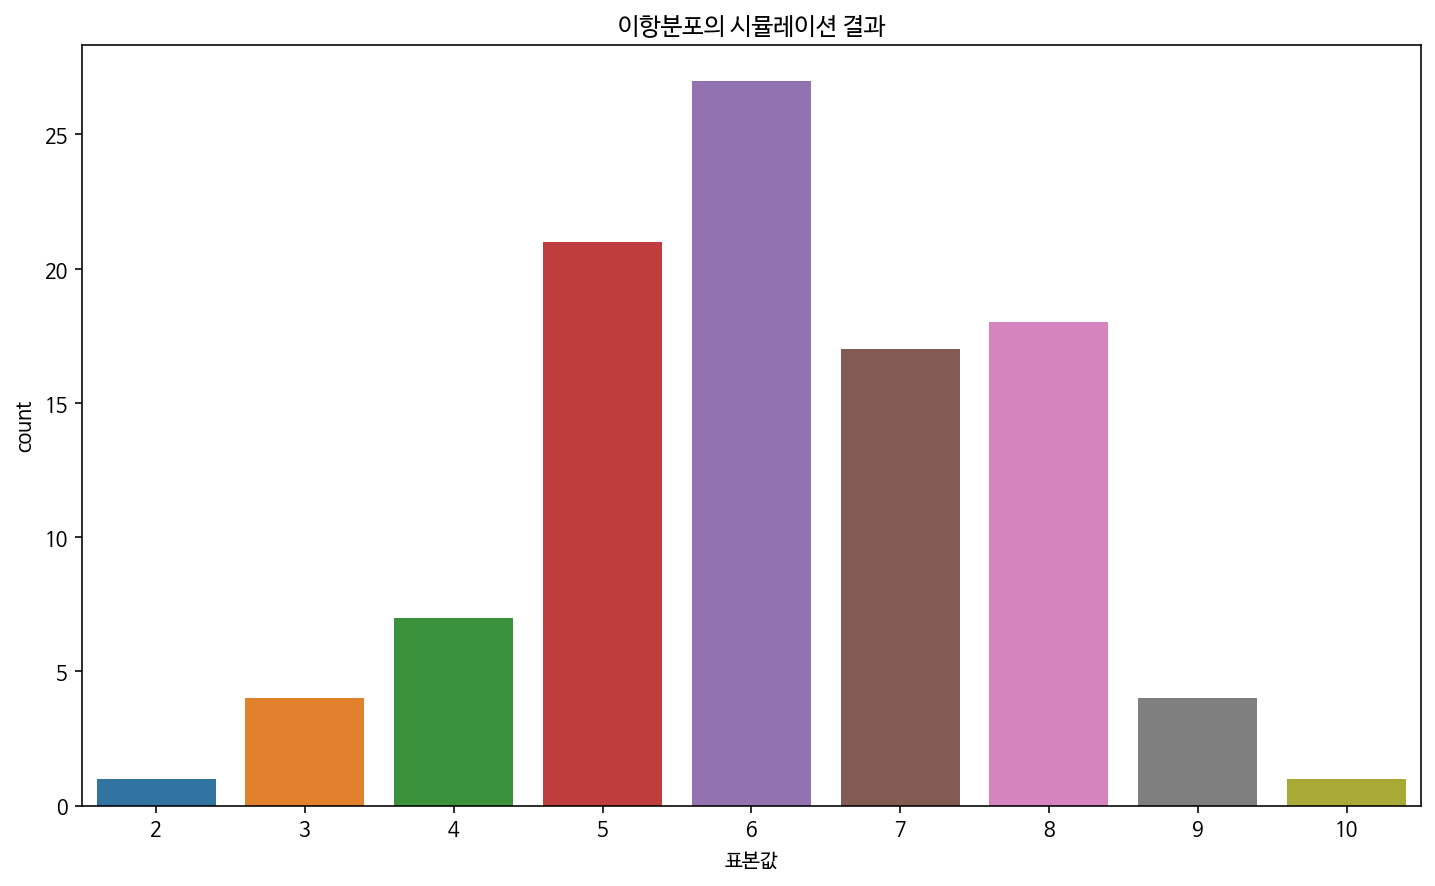

In [ ]:
sns.countplot(x)
plt.title("이항분포의 시뮬레이션 결과")
plt.xlabel("표본값")
plt.show()

# 확률질량함수의 모양과 비슷하지만 정확히 일치하지는 않는다.

In [ ]:
# 이론적인 확률분포와 표본의 확률분포를 같이 나타내기 위한 코드

y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({"이론": rv.pmf(xx), "시뮬레이션": y}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


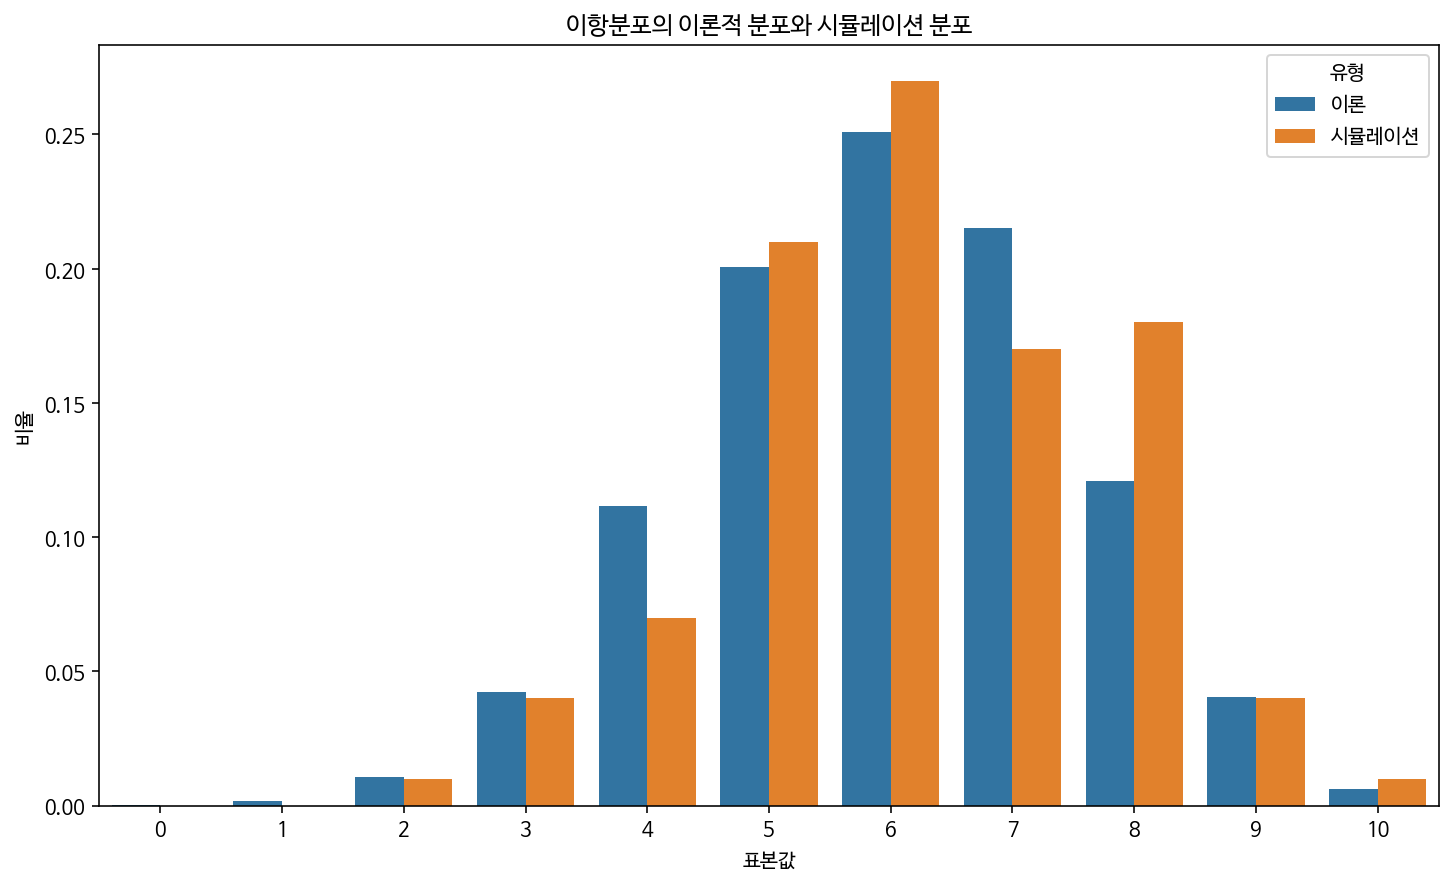

In [ ]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 8) 이항분포의 모멘트

- 기댓값
> $$
\begin{align}
\text{E}[X] = N\mu
\end{align}
$$
> (증명)
> $$
\begin{align}
\text{E}[X] = \text{E} \left[ \sum_{i=1}^N Y_i \right] = \sum_{i=1}^N  \text{E}[ Y_i ] = N\mu
\end{align}
$$
> - $Y_i$는 서로 독립인 베르누이분포이다.

* 분산
> $$
\begin{align}
\text{Var}[X] = N\mu(1-\mu)
\end{align}
$$
> (증명)
> $$
\begin{align}
\text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N Y_i \right] = \sum_{i=1}^N  \text{Var}[ Y_i ] = N\mu(1-\mu)
\end{align}
$$

#### 연습 문제 8.2.3

이항 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률밀도함수와 비교한 바 플롯을 그린다. 

표본 개수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

(1) $\mu = 0.5$, $N=5$

(2) $\mu = 0.9$, $N=20$

In [ ]:
N = 5                     # 전체 시행 횟수
mu = 0.5                   # 기댓값
rv_1 = sp.stats.binom(N, mu) # binom : 이항분포 확률변수
xx = np.arange(N + 1)

np.random.seed(0)
x_10 = rv_1.rvs(10)
x_1000 = rv_1.rvs(1000)

In [ ]:
y_10 = np.bincount(x_10, minlength=N+1)/float(len(x_10))
y_1000 = np.bincount(x_1000, minlength=N+1)/float(len(x_1000))
df = pd.DataFrame({"이론": rv_1.pmf(xx), "시뮬레이션_10개": y_10, "시뮬레이션_1000개": y_1000}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")

유형,시뮬레이션_1000개,시뮬레이션_10개,이론
표본값,,,
0,0.032,0.0,0.03125
1,0.164,0.0,0.15625
2,0.323,0.3,0.31250
3,0.285,0.5,0.31250
4,0.164,0.2,0.15625
5,0.032,0.0,0.03125


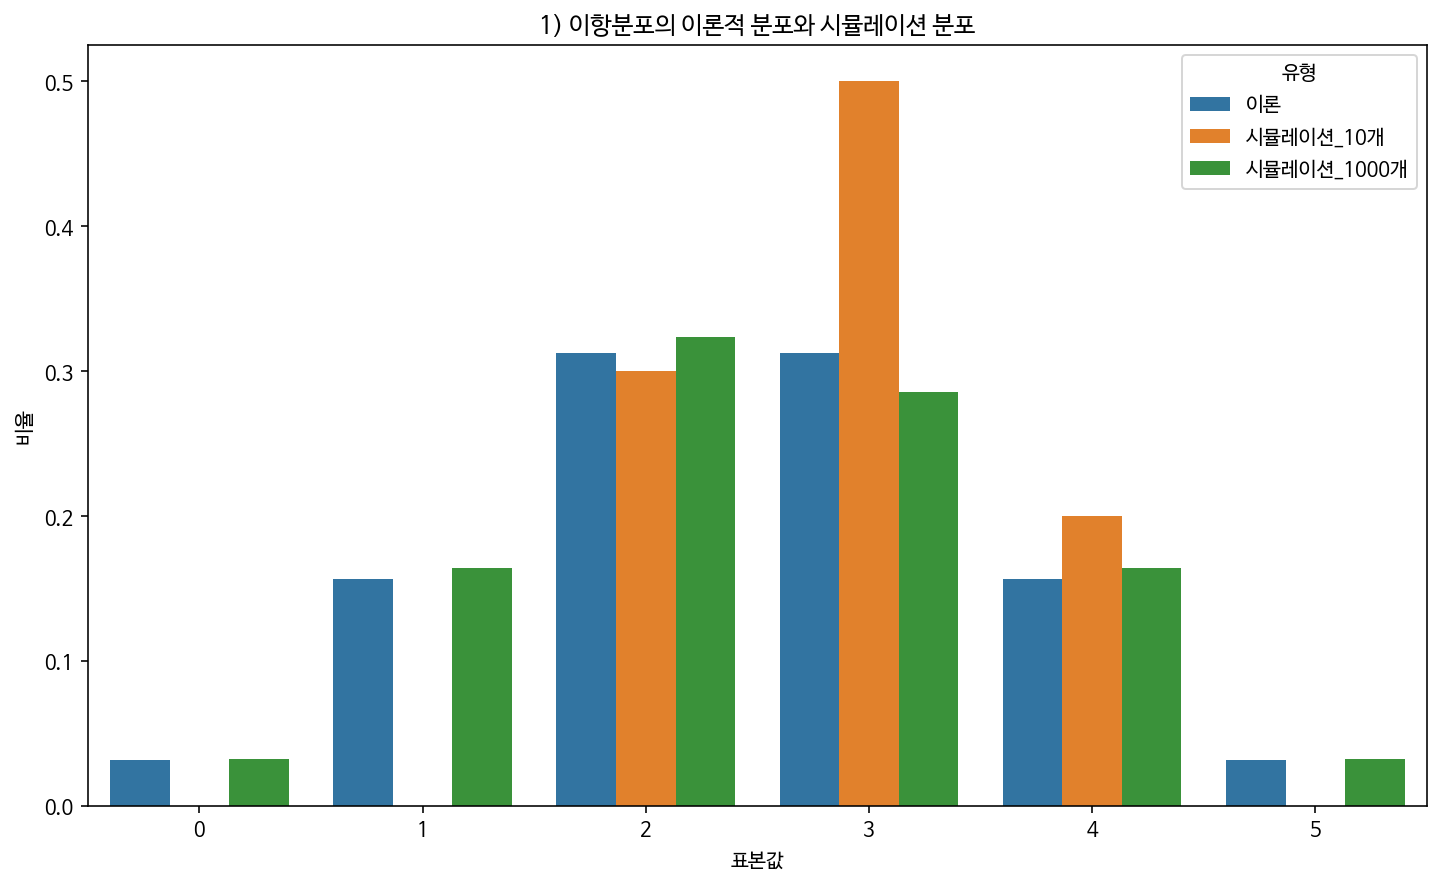

In [ ]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("1) 이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

In [ ]:
N = 20                     # 전체 시행 횟수
mu = 0.9                   # 기댓값
rv_2 = sp.stats.binom(N, mu) # binom : 이항분포 확률변수
xx = np.arange(N + 1)

np.random.seed(0)
x_10 = rv_2.rvs(10)
x_1000 = rv_2.rvs(1000)

In [ ]:
y_10 = np.bincount(x_10, minlength=N+1)/float(len(x_10))
y_1000 = np.bincount(x_1000, minlength=N+1)/float(len(x_1000))
df = pd.DataFrame({"이론": rv_2.pmf(xx), "시뮬레이션_10개": y_10, "시뮬레이션_1000개": y_1000}).stack()
df = df.reset_index()
df.columns = ["표본값", "유형", "비율"]
df.pivot("표본값", "유형", "비율")

유형,시뮬레이션_1000개,시뮬레이션_10개,이론
표본값,,,
0,0.000,0.0,1.000000e-20
1,0.000,0.0,1.800000e-18
2,0.000,0.0,1.539000e-16
3,0.000,0.0,8.310600e-15
4,0.000,0.0,3.178804e-13
5,0.000,0.0,9.154957e-12
6,0.000,0.0,2.059865e-10
7,0.000,0.0,3.707758e-09
8,0.000,0.0,5.422595e-08


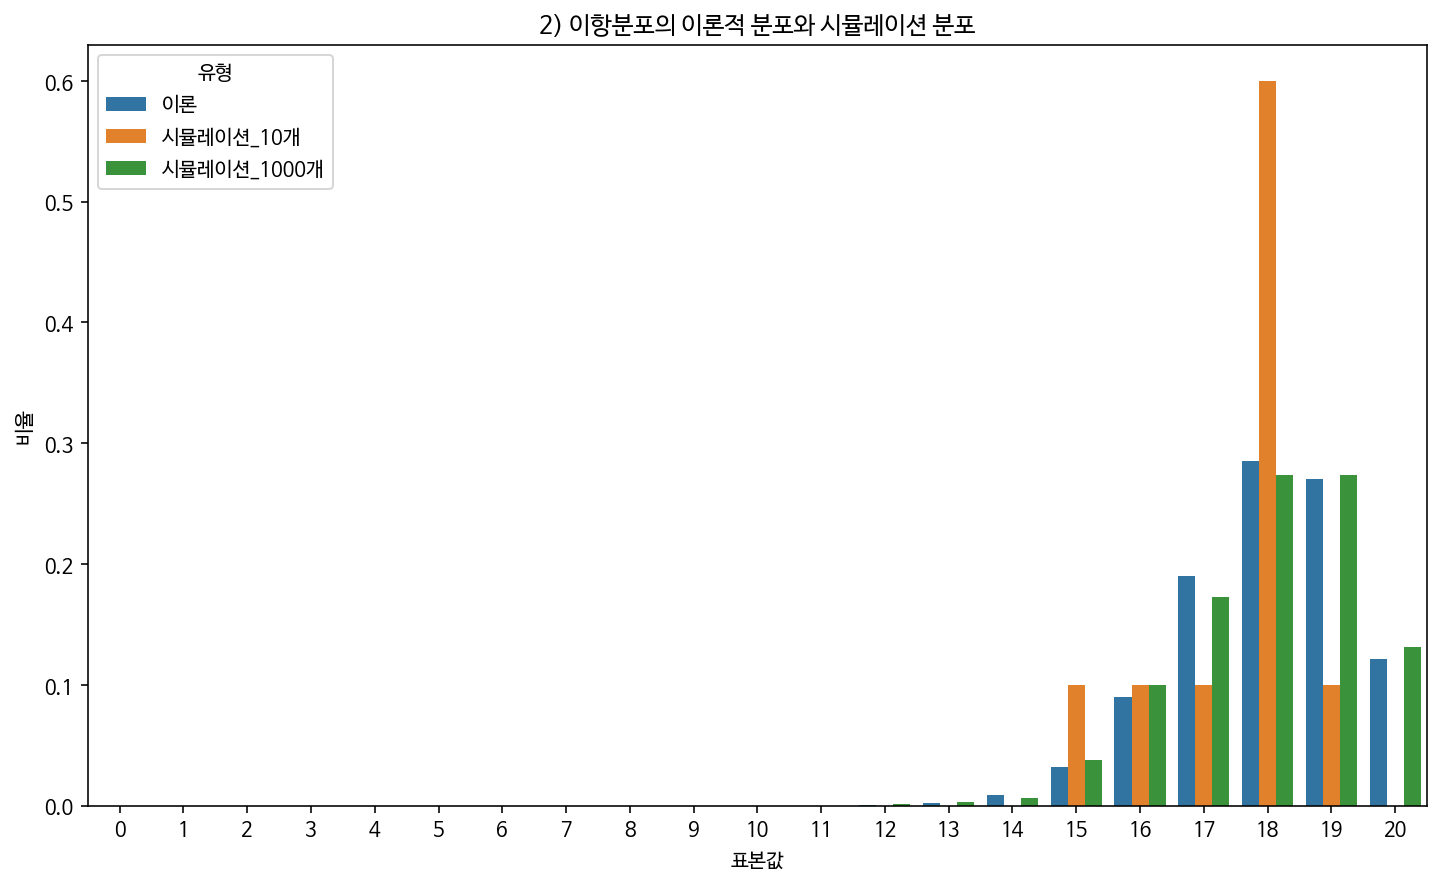

In [ ]:
sns.barplot(x="표본값", y="비율", hue="유형", data=df)
plt.title("2) 이항분포의 이론적 분포와 시뮬레이션 분포")
plt.show()

### 9) 베르누이분포와 이항분포의 모수추정

- 모수추정(parameter estimation) : 데이터에서 모수의 값을 찾아내는 것 
- 베르누이분포와 이항분포는 공통된 모수 $\mu$를 가짐. 보통은 이항분포(표본 데이터가 한 개보다 많기 때문)임.
> $$
\begin{align}
\hat{\mu}\text{(추정값)} = \dfrac{\sum_{i=1}^N x_i}{N}= \dfrac{N_1}{N}
\end{align}
$$
> $N$ = 전체 데이터의 수, $N_1$ = 1이 나온 횟수

### 10) 베르누이분포의 활용

1. 분류예측 문제의 출력 데이터가 두 값으로 구분되는 카테고리값인 경우에 분류 결과 : 두 값 중 어느 값이 가능성이 높은지를 표현(베이지안 관점).
2. 입력 데이터가 0 또는 1 혹은 참 또는 거짓, 두 개의 값으로 구분되는 카테고리값인 경우 : 두 종류의 값이 나타나는 비율을 표현하는 데 사용(빈도주의적 관점).

#### 예제_스팸 메일 필터

스팸 메일(spam mail)과 정상 메일을 구분해야 하는 스팸 메일 필터(spam mail filter)를 만들어야 한다고 가정하자. 스팸 메일 필터를 만들기 위해 특정한 메일 계정으로 들어오는 메일을 모두 분석하였했다.  만약  메일이 모두 10통이고 이 중 6통이 스팸 메일이라면 이 메일 계정으로 들어온 메일이 스팸 메일일 가능성은 60%이다. 이러한 상황은 $\mu = 0.6$인 베르누이분포로 나타낼 수 있다.
> $$
\begin{align}
p(y) = \text{Bern}(y; \mu = 0.6)
\end{align}
$$
> - 확률변수 $Y$ = 메일이 스팸 메일인지 아닌지, $Y=1$ = 스팸 메일

#### 예제_스팸 메일 필터_입력 데이터

이번에는 스팸 메일 필터의 입력 데이터에서 베르누이분포를 활용하는 방법을 알아보자. 스팸 메일은 특정한 단어(키워드)를 가지고 있을 확률이 높다. 스팸 메일을 구분하기 위한 키워드가 여러 개라면 다음과 같이 BOW(Bag of Words) 인코딩된 벡터로 나타낼 수 있다. 이 예에서는 4개의 키워드 4개를 사용하였했다. 만약 어떤 메일이 첫 번째와 세 번째 키워드를 포함하고 있으며 두 번째와 네 번째 키워드는 포함하지 않으면 다음과 같은 특징 벡터로 표시할 수 있다.

- 한 메일이 첫 번째와 세 번째의 키워드를 포함하는 경우
> $$
\begin{align}
x = \begin{bmatrix} 1 \\ 0 \\ 1 \\ 0 \end{bmatrix}
\end{align}
$$

- 여러개의 메일인 경우 (행 벡터 = 메일, 열 벡터 = 키워드)
> $$ 
\begin{align}
X_{\text{spam}} =
\begin{bmatrix} 
1 & 0 & 1 & 0 \\
1 & 1 & 1 & 0 \\
1 & 1 & 0 & 1 \\
0 & 0 & 1 & 1 \\
1 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 \\
\end{bmatrix} 
\end{align}
$$

- 스팸 메일의 특성은 4개의 베르누이 확률변수의 튜플 $(X_1, X_2, X_3, X_4)$로 나타낼 수 있다. 
1. $X_1$: 메일이 첫 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_1=1 | Y=1) = \text{Bern}(x_1; \mu_{spam,1})
\end{align}
$$

2. $X_2$: 메일이 두 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_2=1 | Y=1) = \text{Bern}(x_2; \mu_{spam,2})
\end{align}
$$

3. $X_3$: 메일이 세 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_3=1 | Y=1) = \text{Bern}(x_3; \mu_{spam,3})
\end{align}
$$

4. $X_4$: 메일이 네 번째 키워드를 포함하면 1, 아니면 0이 되는 확률변수

$$
\begin{align}
p(X_4=1 | Y=1) = \text{Bern}(x_4; \mu_{spam,4})
\end{align}
$$


- 특징 행렬의 각 열로부터 각 베르누이 확률분포의 모수의 추정값을 구하면  다음과 같다.
> $$
\begin{align}
\hat\mu_{spam,1} = \dfrac{5}{6},\;\; \hat\mu_{spam,2} = \dfrac{4}{6},\;\; \hat\mu_{spam,3} = \dfrac{3}{6},\;\; \hat\mu_{spam,4} = \dfrac{3}{6}
\end{align}
$$


#### 연습 문제 8.2.4

(1) 위 예제와 같이 키워드 4개를 사용하는 스팸 메일 필터를 만드는 데 스팸 메일이 아닌 정상 메일 5통을 다음과 같은 특징 행렬로 표시한다고 가정하자.

$$ 
\begin{align}
X_{\text{ham}} = 
\begin{bmatrix} 
0 & 0 & 1 & 1 \\
0 & 1 & 1 & 1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 1 \\
0 & 0 & 0 & 1 \\
\end{bmatrix} 
\tag{8.2.30}
\end{align}
$$

이 정상 메일에 각각의 키워드가 있을 확률을 나타내는 베르누이 확률분포

$$
\begin{align}
p(X_1=1|Y=0) = \text{Bern}(x_1; \mu_{ham,1})
\tag{8.2.31}
\end{align}
$$

$$
\begin{align}
p(X_2=1|Y=0) = \text{Bern}(x_2; \mu_{ham,2})
\tag{8.2.32}
\end{align}
$$

$$
\begin{align}
p(X_3=1|Y=0) = \text{Bern}(x_3; \mu_{ham,3})
\tag{8.2.33}
\end{align}
$$

$$
\begin{align}
p(X_4=1|Y=0) = \text{Bern}(x_4; \mu_{ham,4})
\tag{8.2.34}
\end{align}
$$


의 모수를 구하라. 우리가 구한 모수에 문제점은 없는가?

> (답) $$
\begin{align}
\hat\mu_{ham,1} = \dfrac{0}{5}=0,\;\; \hat\mu_{ham,2} = \dfrac{1}{5},\;\; \hat\mu_{ham,3} = \dfrac{3}{5},\;\; \hat\mu_{ham,4} = \dfrac{5}{5}=1
\end{align}
$$
++ 문제점 : 첫 번째 모수가 0 - 첫 번째 키워드 절대 발생 X, 마지막 모수가 1 - 마지막 키워드는 항상 발생

(2) 키워드 4개를 사용하는 스팸 메일 필터를 만드는 데 스팸 메일과 정상 메일의 특성을 모두 모형화하려면 베르누이 확률변수가 몇 개 필요한가?

> 답 : 스팸메일 키워드 특성 모형화 베르누이 확률변수 4개 + 정상 메일 키워드 특성 모형화 베르누이 확률변수 4개 = 8개